# Тема: Анализ нефтяной зависимости России

**Цель работы:**
    
Определить степень зависимости экономики России от нефтяной отрасли и оценить, насколько эта зависимость влияет на устойчивость и развитие страны.

**Задачи:**

1. Определить рост как нефтегазовых, так и ненефтегазовых доходов
2. Определить зависимость курса рубля к доллару от цены за баррель
3. Определить зависимость ВВП от цены за баррель

# Описание исходных данных

In [66]:
# Используемые библиотеки для анализа данных
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
# Федеральный бюджет
DATA_FEDBUD = "data/Prilozhenie_3_3.xlsx"

DF_FEDBUD = pd.read_excel(DATA_FEDBUD, skiprows = 2, nrows = 3, index_col='Года')
DF_FEDBUD = DF_FEDBUD.T.iloc[1:]
DF_FEDBUD.index = pd.to_datetime(DF_FEDBUD.index, format='%Y')
DF_FEDBUD = DF_FEDBUD.loc[:'2023-01-01']
DF_FEDBUD

Года,"Доходы, всего",Нефтегазовые доходы,Ненефтегазовые доходы
2006-01-01,6278.888405,2943.54159,3335.346815
2007-01-01,7781.119784,2897.373188,4883.746596
2008-01-01,9275.93131,4389.433699,4886.497612
2009-01-01,7337.750522,2983.95626,4353.794262
2010-01-01,8305.414367,3830.67279,4474.741577
2011-01-01,11367.652623,5641.769451,5725.883172
2012-01-01,12855.540621,6453.184234,6402.356388
2013-01-01,13019.939485,6534.035804,6485.903681
2014-01-01,14496.880496,7433.805828,7063.074668
2015-01-01,13659.242939,5862.65112,7796.591819


DF_FEDBUD - доходы федерального бюджета с 2006 по 2023 года. Разделен на нефтегазовые и ненефтегазовые доходы

In [68]:
# Цена за баррель нефти
DATA_OIL_PRICE = "data/Crude_Oil_Price_2000_2023.csv"
DF_OIL_PRICE = pd.read_csv(DATA_OIL_PRICE, index_col='Date')
DF_OIL_PRICE.index = pd.to_datetime(DF_OIL_PRICE.index, format='%d-%b-%y')
DF_OIL_PRICE = DF_OIL_PRICE.resample('6ME').last()
DF_OIL_PRICE.index = (DF_OIL_PRICE.index - pd.Timedelta(days=30)).ravel()
DF_OIL_PRICE = DF_OIL_PRICE.sort_index(ascending=True)
DF_OIL_PRICE = DF_OIL_PRICE.iloc[12:47]
DF_OIL_PRICE

,Price
Date,
2006-01-01,67.92
2006-07-01,74.40
2007-01-01,58.14
2007-07-01,78.21
2008-01-01,91.75
2008-07-01,124.08
2009-01-01,41.68
2009-07-01,69.45
2010-01-01,72.89


DF_OIL_PRICE - цена нефти, $ за баррель на начало января/июля

In [69]:
# Курс доллара к рублю
DATA_USD_RUB = 'data/RC_F01_01_2010_T03_12_2024.xlsx'
DF_USD_RUB= pd.read_excel(DATA_USD_RUB, index_col='Data')
DF_USD_RUB = DF_USD_RUB.drop('Unnamed: 0', axis = 1)
DF_USD_RUB = DF_USD_RUB.resample('6ME').last()
DF_USD_RUB.index = DF_USD_RUB.index - pd.Timedelta(days=30)
DF_USD_RUB = DF_USD_RUB.iloc[:27]
DF_USD_RUB

,Curs
Data,
2010-01-01,30.4312
2010-07-01,30.1869
2011-01-01,29.6684
2011-07-01,27.6796
2012-01-01,30.3647
2012-07-01,32.1881
2013-01-01,30.0277
2013-07-01,32.8901
2014-01-01,35.2448


DF_USD_RUB - курс рубля к доллару на начало января/июля

In [72]:
# Экспорт товаров
DATA_99STRU = 'data/99stru.xlsx'
DF_99STRU = pd.read_excel(DATA_99STRU, index_col='Года', sheet_name = "Лист1")
DF_99STRU = DF_99STRU.T
DF_99STRU.index = pd.to_datetime(DF_99STRU.index, format='%Y')
DF_99STRU = DF_99STRU.T
DF_99STRU

,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01
Года,,,,,,,,,,,,,,,,
продовольственные товары и сельскохозяйственное сырье (кроме текстильного),1.8,2.6,2.0,3.3,2.2,2.6,3.2,3.1,3.8,4.7,6.0,5.8,5.5,5.9,8.8,7.3
минеральные продукты,65.9,64.9,69.8,67.4,68.5,71.1,71.3,71.5,70.4,63.8,59.2,60.5,64.9,63.3,51.3,56.2
"продукция химической промышленности, каучук",5.6,5.9,6.4,6.2,6.2,6.3,6.1,5.9,5.9,7.4,7.3,6.7,6.1,6.4,7.1,7.7
"кожевенное сырье, пушнина и изделия из них",0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.0
древесина и целлюлозно-бумажные изделия,3.2,3.5,2.5,2.8,2.4,2.2,1.9,2.1,2.3,2.9,3.4,3.3,3.1,3.0,3.7,3.4
"текстиль, текстильные изделия и обувь",0.3,0.3,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.4,0.4
"металлы, драгоценные камни и изделия из них",16.3,15.9,13.2,12.8,12.7,11.4,11.1,10.5,10.5,11.9,13.1,13.3,12.0,12.5,19.3,16.8
"машины, оборудование и транспортные средства",5.8,5.6,4.9,5.9,5.4,5.0,5.1,5.5,5.3,7.4,8.6,8.0,6.5,6.6,7.5,6.6
прочие товары,1.0,1.2,0.9,1.3,2.3,1.1,1.1,1.3,1.4,1.5,2.0,2.1,1.5,2.0,1.9,1.6


DATA_99STRU - экспорт всех товаров России с 2006 по 2021 года. 

In [76]:
# ВВП
DATA_GDP = "data/VVP_god_s_1995-2023.xlsx"

DF_GDP = pd.read_excel(DATA_GDP, skiprows = 2, nrows = 2, sheet_name = "6", index_col='Года')
DF_GDP = DF_GDP.T
DF_GDP.index = pd.to_datetime(DF_GDP.index, format='%Y')
DF_GDP

Года,ВВП
2011-01-01,117583.905320
2012-01-01,122315.582977
2013-01-01,124462.737812
2014-01-01,125379.116154
2015-01-01,122905.738223
2016-01-01,123143.771156
2017-01-01,125393.244920
2018-01-01,128912.206739
2019-01-01,131745.794647
2020-01-01,128249.716443


DF_GDP - ВВП России с 2011 по 2023 года в млрд руб, в ценах за 2021 год

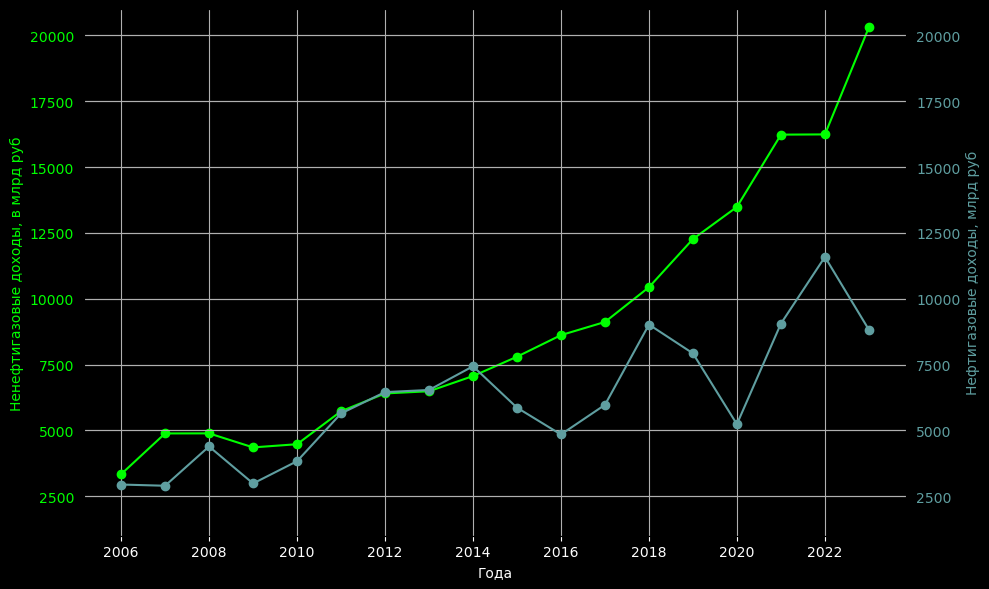

In [70]:
# Анализ диверсификации экономики
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')

ax1.set_facecolor('black')
ax1.plot(DF_FEDBUD.index, DF_FEDBUD['Ненефтегазовые доходы'], color='lime', marker="o")
ax1.set_xlabel('Года', color='white')
ax1.set_ylabel('Ненефтигазовые доходы, в млрд руб', color='lime')
ax1.tick_params(axis='y', labelcolor='lime')
ax1.tick_params(axis='x', colors='white')
ax1.set_ylim(1000, 21000)
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(DF_FEDBUD.index, DF_FEDBUD['Нефтегазовые доходы'], marker="o",color='#5F9EA0')
ax2.set_ylabel('Нефтигазовые доходы, млрд руб', color='#5F9EA0')
ax2.tick_params(axis='y', labelcolor='#5F9EA0')
ax2.set_ylim(1000, 21000)
ax2.grid(True)

plt.tight_layout()
plt.show()

Ненефтигазовые доходы почти все время росли в не зависимости от кризисов, нет выраженных падений. Можно только выделить падение доходов после кризиса 2008 года и стагнацию в росте в 2012-2015 годах. В последующие годы доходы от ненефтигазового сектора постоянно росли. Это свидетельствует о стремлении к диверсификации экономики и созданию более устойчивых источников дохода. 

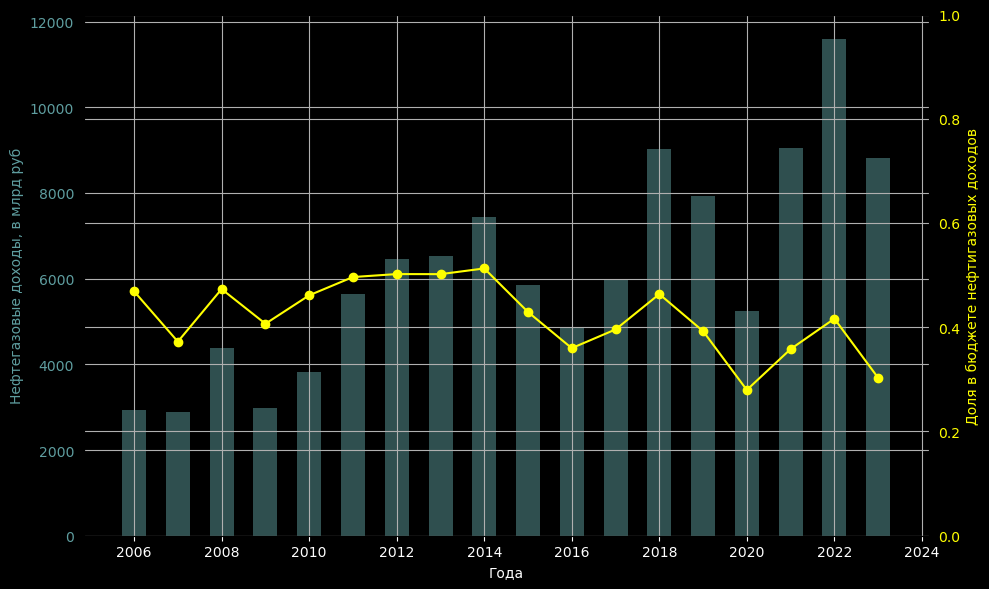

In [ ]:
# Нефтегазовые доходы и их доля в бюджете
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')

ax1.set_facecolor('black')
ax1.bar(DF_FEDBUD.index, DF_FEDBUD['Нефтегазовые доходы'], color='#2F4F4F', width = 200)
ax1.set_xlabel('Года', color='white')
ax1.set_ylabel('Нефтегазовые доходы, в млрд руб', color='#5F9EA0')
ax1.tick_params(axis='y', labelcolor='#5F9EA0')
ax1.tick_params(axis='x', colors='white')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(DF_FEDBUD.index, DF_FEDBUD['Нефтегазовые доходы']/DF_FEDBUD['Доходы, всего'], marker="o",color='yellow')
ax2.set_ylabel('Доля в бюджете нефтигазовых доходов', color='yellow')
ax2.tick_params(axis='y', labelcolor='yellow')
ax2.set_ylim(0, 1)
ax2.grid(True)

plt.tight_layout()
plt.show()

Видно, что доля нефтегазовых доходов практически не изменилась, при этом сами доходы кратно выросли. Также можно заметить, что доходы в 2015 году даже выросли, несмотря на санкции и падение цены на нефть. В целом, нефтегазовые доходы составляют ~30% всех доходов бюджета, что говорит о зависимости экономики от цен на нефть. Интересно, что курс доллара к рублю упал в 2 раза после 2015 года, а доходы в свою очередь нет. Чтобы понять этот феномен надо проанализировать как менялись курс доллара к рублю и цены за баррель. 

Курс валюты зависит от импорта и экспорта, значит, если экспорт в основном состоит из одного товара, то и экспорт будет зависеть от стоимости этого товара

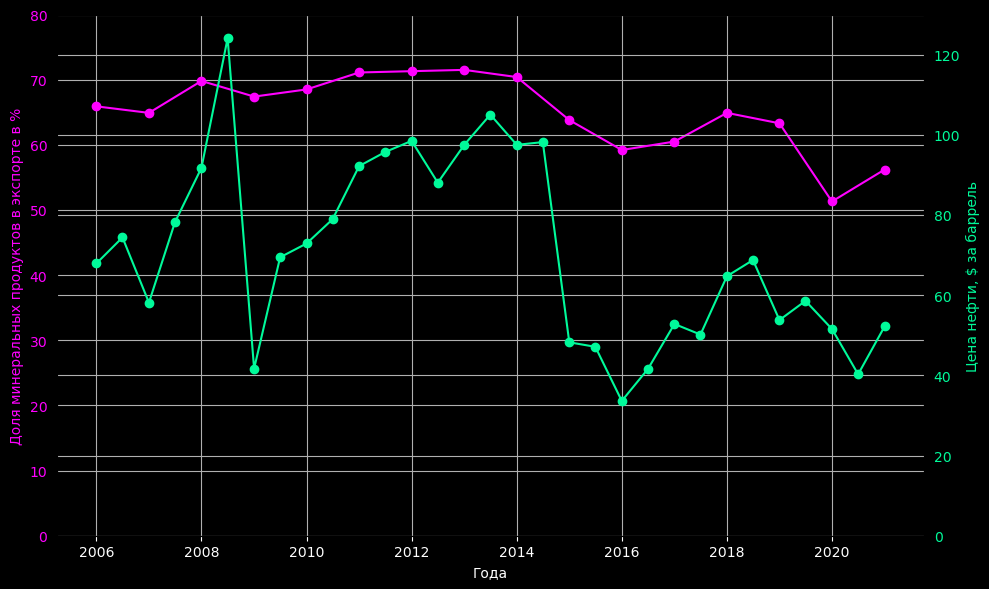

In [73]:
# Экспорт и цена за баррель
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')

ax1.set_facecolor('black')
ax1.plot(DF_99STRU.columns, DF_99STRU.iloc[1], color='#FF00FF', marker="o")
ax1.set_xlabel('Года', color='white')
ax1.set_ylabel('Доля минеральных продуктов в экспорте в %', color='#FF00FF')
ax1.tick_params(axis='y', labelcolor='#FF00FF')
ax1.tick_params(axis='x', colors='white')
ax1.set_ylim(0, 80)
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(DF_OIL_PRICE.loc['2006-01-01':'2021-01-01'].index, DF_OIL_PRICE.loc['2006-01-01':'2021-01-01']['Price'], marker="o",color='#00FA9A')
ax2.set_ylabel('Цена нефти, $ за баррель', color='#00FA9A')
ax2.tick_params(axis='y', labelcolor='#00FA9A')
ax2.set_ylim(0, 130)
ax2.grid(True)

plt.tight_layout()
plt.show()

К сожалению, в росстате нет отдельной статистики о доли нефти в экспорте. Однако в понятие минаральных продуктов также входит и нефть. Среднее значение доли экспорта минеральных продуктов составляет примерно 64%. В целом, доля минеральных продуктов в экспорте снизилась, но при этом видна зависимость доли экспорта от цены на нефть.

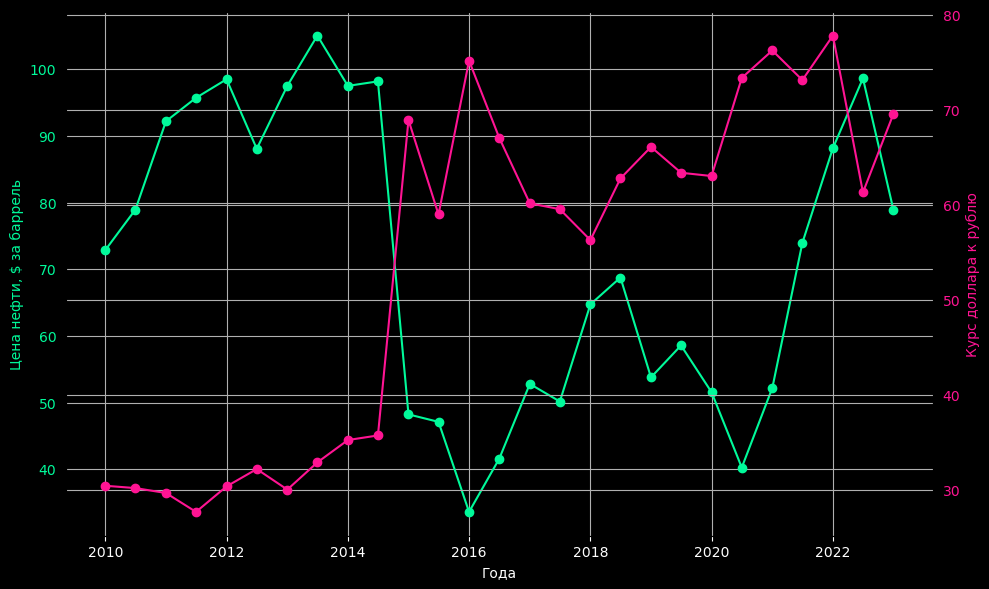

In [74]:
# Курс доллара к рублю
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')

ax1.set_facecolor('black')
ax1.plot(DF_OIL_PRICE.loc['2010-01-01':].index, DF_OIL_PRICE.loc['2010-01-01':]['Price'], color='#00FA9A', marker="o")
ax1.set_xlabel('Года', color='white')
ax1.set_ylabel('Цена нефти, $ за баррель', color='#00FA9A')
ax1.tick_params(axis='y', labelcolor='#00FA9A')
ax1.tick_params(axis='x', colors='white')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(DF_USD_RUB.loc[:'2023-01-01'].index, DF_USD_RUB.loc[:'2023-01-01']['Curs'], marker="o",color='#FF1493')
ax2.set_ylabel('Курс доллара к рублю', color='#FF1493')
ax2.tick_params(axis='y', labelcolor='#FF1493')
ax2.grid(True)

plt.tight_layout()
plt.show()

Продажа нефти происходит в долларах, и если до 2015 года мы продавали баррель нефти по 83 доллара, при курсе доллара в 36 рублей, получая доход в рублях (2988 руб. за баррель), то когда нефть начала стоить 48 долларов за баррель, а доллар под 70 (3360 руб. за баррель) доходы бюджета наоборот выросли за счет падения рубля, тем самым оставив доходы от нефтегазового сектора почти незатронутым, как могло быть. Если бы доллар по прежнему стоил бы 35-40 рублей, то бюджет бы не досчитался еще 2млрд рублей. После кризиса 2014 и до кризиса 2020 года цена за баррель стала колебаться в районе 60 долларов, поэтому рубль упал примерно также в 2 раза, чтобы сохранить доходы и даже увеличить их.

Слабый рубль может поддерживать экспортеров и приносить краткосрочную выгоду бюджету за счет роста доходов от продажи нефти и газа, его долгосрочные последствия для внутреннего рынка и уровня жизни населения, как правило, негативны, так как увеличиваются расходы на импорт, увеличивается инфляция, что приводит к росту цен. Для борьбы с инфляцией повышают ключевую ставку, что приводит к замеделению экономической деятельности в стране. Это было видно при анализе роста ненефтегазовых доходов (стаганация в росте до 2015 года). Но инфляция к 2016 году составила уже 6% годовых, а ключевая ставка около 10%(при изначальной (в 2014) в 17%), что вполне нормально для нашей экономики, поэтому из минусов оставался только импорт, но как протекционистская политика это способствовало росту внутреннего производства 


In [ ]:
# Корреляция курса рубля к цены за баррель
DF_CORR_CURS_OIL = pd.concat([pd.DataFrame(DF_USD_RUB.loc['2011-01-01':]['Curs']), pd.DataFrame(DF_OIL_PRICE.loc['2011-01-01':]['Price'])], axis=1)
DF_CORR_CURS_OIL = DF_CORR_CURS_OIL.corr()
DF_CORR_CURS_OIL

,Curs,Price
Curs,1.000000,-0.734402
Price,-0.734402,1.000000


Видим отрицателньую корреляцию, это говорит о том, что при росте цены за баррель рубль укрепляется и наоборот. Однако это не противоречит тренду диверсификации экономики в стране, что видно в последние годы

Проанализируем рост ВВП от цены на нефть

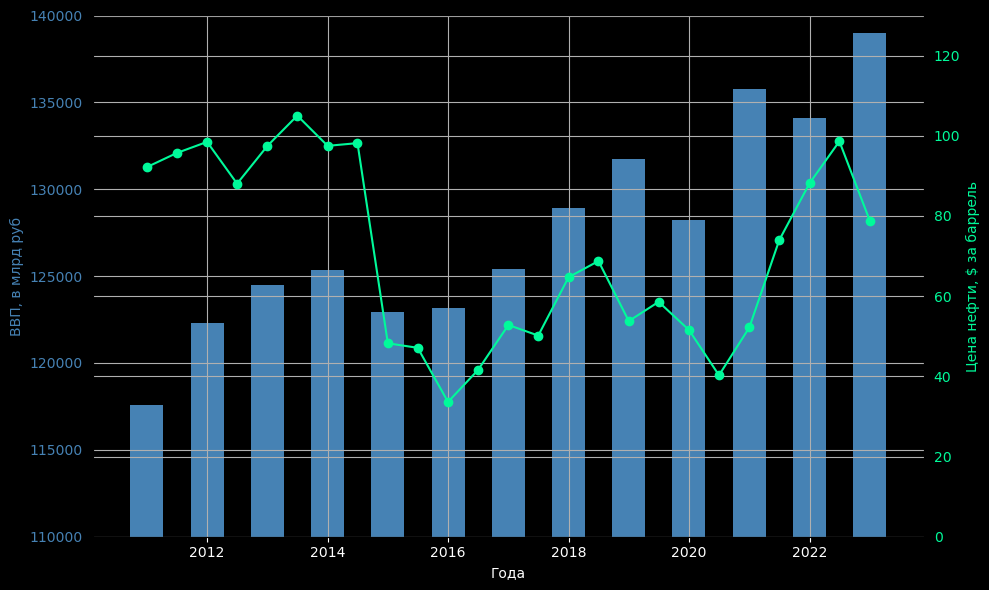

In [ ]:
# Анализ роста ВВП и цены за баррель
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')

ax1.set_facecolor('black')
ax1.bar(DF_GDP.index, DF_GDP['ВВП'], width=200,  color='#4682B4')
ax1.set_ylabel('ВВП, в млрд руб', color='#4682B4')
ax1.tick_params(axis='y', labelcolor='#4682B4')
ax1.set_xlabel('Года', color='white')
ax1.set_ylim(110000,140000)
ax1.tick_params(axis='x', colors='white')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(DF_OIL_PRICE.loc['2011-01-01':].index, DF_OIL_PRICE.loc['2011-01-01':]['Price'], color='#00FA9A', marker = 'o')
ax2.set_xlabel('Дата')
ax2.set_ylabel('Цена нефти, $ за баррель', color='#00FA9A')
ax2.tick_params(axis='y', labelcolor='#00FA9A')
ax2.set_ylim(0,130)
ax2.grid(True)


plt.tight_layout()
plt.show()

In [80]:
# Корреляция ВВП и цен на нефть до 2014
DF_CORR_GDP_BEFORE_2014 = pd.concat([pd.DataFrame(DF_GDP.loc['2011-01-01':'2014-01-01']['ВВП']), pd.DataFrame(DF_OIL_PRICE.loc['2011-01-01':'2014-01-01']['Price'])], axis=1)
DF_CORR_GDP_BEFORE_2014 = DF_CORR_GDP_BEFORE_2014.ffill()
DF_CORR_GDP_BEFORE_2014 = DF_CORR_GDP_BEFORE_2014.corr()
DF_CORR_GDP_BEFORE_2014

,ВВП,Price
ВВП,1.000000,0.459738
Price,0.459738,1.000000


In [79]:
# Корреляция ВВП и цен на нефть после 2014
DF_CORR_GDP_AFTER_2014 = pd.concat([pd.DataFrame(DF_GDP.loc['2014-01-01':]['ВВП']), pd.DataFrame(DF_OIL_PRICE.loc['2014-01-01':]['Price'])], axis=1)
DF_CORR_GDP_AFTER_2014 = DF_CORR_GDP_AFTER_2014.ffill()
DF_CORR_GDP_AFTER_2014 = DF_CORR_GDP_AFTER_2014.corr()
DF_CORR_GDP_AFTER_2014

,ВВП,Price
ВВП,1.000000,0.413044
Price,0.413044,1.000000


Из корреляции видно, что до 2014 года рост ВВП был более зависим от цен на нефть, чем после 2014. Это говорит о том, при условии увеличения доходов от внутреннего производства, нефтегазовый сектор является важной частью экономики, которая до сих пор, но уже в меньшей степени, влияет на экономические связи внутри страны.

# Вывод

Несмотря на то, что нефтегазовый сектор все еще значителен, другие отрасли становятся более важными для общего экономического роста, это видно из доли экспорта минеральных продуктов, роста ненефтегазовых доходов и их стабильность в кризисные года. Прослеживается тренд диверсификации экономики, также этому процессу поспособствовало ослабление рубля и грамотная политика центробанка.